In [278]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist


In [279]:
# Load the data into a DataFrame
data = pd.read_excel('DATA.xlsm', sheet_name='Customer_Master')
data

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,STT,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
0,1,11000128,Customer 48,11000128,Company 4,Account 3,91363,91240,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
1,2,11000144,Customer 50,11000144,Company 6,Account 4,91418,91295,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne
2,3,11000149,Customer 51,11000149,Company 7,Account 3,91363,91240,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast
3,4,11000159,Customer 52,11000159,Company 8,Account 3,91363,91240,Foodservice,National Distributor,153.122555,-27.617230,Logan,Queensland,Australia,Organization 1,Greater Brisbane
4,5,11000176,Customer 53,11000176,Company 9,Account 4,91418,91295,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,310,14021924,Customer 639,11002237,Company 211,Account 11,91379,91256,Foodservice,Global QSR Distributor,153.118374,-27.445906,Brisbane,Queensland,Australia,NaN,Greater Brisbane
310,311,14022011,Customer 640,14001726,Company 305,Account 3,91363,91240,Foodservice,National Distributor,153.103894,-27.425455,Brisbane,Queensland,Australia,NaN,Greater Brisbane
311,312,14022270,Customer 650,11000312,Company 27,Account 6,91346,91223,Foodservice,National Distributor,144.371612,-38.054289,Greater Geelong,Victoria,Australia,NaN,Ballarat & Geelong
312,313,14022376,Customer 855,14022376,Company 499,Account 14,91437,91314,Foodservice,National Distributor,147.383224,-35.121731,Wagga Wagga,New South Wales,Australia,NaN,Riverina


Nhóm tác giả lấy data từ sheet Customer_Master của file DATA.xlsm

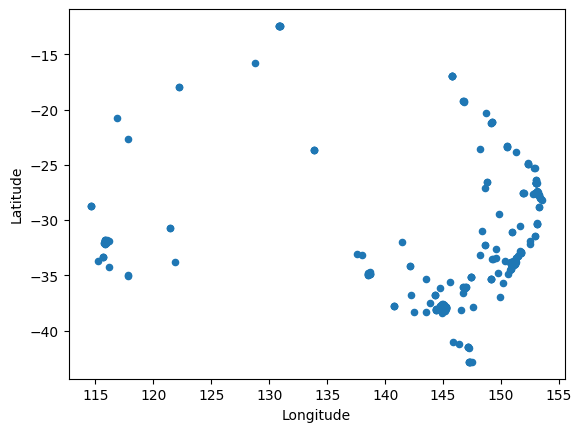

In [282]:
data.plot(kind='scatter', x='Longitude', y='Latitude')
plt.show()

Vẽ đồ thị trực quan dữ liệu. Việc phân cụm dựa trên kinh độ (Longitude) và dựa trên vĩ độ(Latitude)

In [283]:
df = data.drop(['STT'], axis = 1)
df

,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
0,11000128,Customer 48,11000128,Company 4,Account 3,91363,91240,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
1,11000144,Customer 50,11000144,Company 6,Account 4,91418,91295,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne
2,11000149,Customer 51,11000149,Company 7,Account 3,91363,91240,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast
3,11000159,Customer 52,11000159,Company 8,Account 3,91363,91240,Foodservice,National Distributor,153.122555,-27.617230,Logan,Queensland,Australia,Organization 1,Greater Brisbane
4,11000176,Customer 53,11000176,Company 9,Account 4,91418,91295,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,14021924,Customer 639,11002237,Company 211,Account 11,91379,91256,Foodservice,Global QSR Distributor,153.118374,-27.445906,Brisbane,Queensland,Australia,NaN,Greater Brisbane
310,14022011,Customer 640,14001726,Company 305,Account 3,91363,91240,Foodservice,National Distributor,153.103894,-27.425455,Brisbane,Queensland,Australia,NaN,Greater Brisbane
311,14022270,Customer 650,11000312,Company 27,Account 6,91346,91223,Foodservice,National Distributor,144.371612,-38.054289,Greater Geelong,Victoria,Australia,NaN,Ballarat & Geelong
312,14022376,Customer 855,14022376,Company 499,Account 14,91437,91314,Foodservice,National Distributor,147.383224,-35.121731,Wagga Wagga,New South Wales,Australia,NaN,Riverina


In [284]:
sc = StandardScaler()
data_stand = sc.fit_transform(df[['Longitude', 'Latitude']])
data_stand

array([[ 1.67710508e-01, -9.79263193e-01],
       [ 1.45620939e-01, -9.31227846e-01],
       [ 7.92463711e-01, -3.65352625e-02],
       [ 8.44022842e-01,  7.04356944e-01],
       [ 1.66931542e-01, -9.73596045e-01],
       [-1.05816969e+00,  3.16069867e+00],
       [-2.33413079e+00, -4.57549807e-03],
       [ 1.38913815e-01, -9.28268988e-01],
       [ 3.73522148e-01, -9.47544291e-01],
       [ 9.45309706e-02, -9.92528938e-01],
       [ 7.79246249e-01,  1.14988937e+00],
       [ 6.83609645e-01,  1.31533088e+00],
       [ 6.20155422e-01,  1.39902792e+00],
       [-4.03635142e-01, -4.62935601e-01],
       [ 3.17859438e-01, -6.58230657e-01],
       [ 7.18485070e-01,  2.35603370e-01],
       [ 8.40971092e-01,  7.30456285e-01],
       [ 2.14420001e-01,  2.42862170e+00],
       [ 5.04875758e-01, -5.41994045e-01],
       [ 6.86733816e-01, -2.33022810e-01],
       [ 8.41194917e-01,  2.63063034e-01],
       [-1.05215845e+00,  3.15574151e+00],
       [ 9.72390501e-02, -1.00478520e+00],
       [ 8.

Standardization: x_stand = (x-mean(x))/Standard Deviation

In [285]:
data_stand = pd.DataFrame(data_stand, columns=['Longitude', 'Latitude'])
data_stand

,Longitude,Latitude
0,0.167711,-0.979263
1,0.145621,-0.931228
2,0.792464,-0.036535
3,0.844023,0.704357
4,0.166932,-0.973596
...,...,...
309,0.843666,0.732069
310,0.842429,0.735377
311,0.096406,-0.983845
312,0.353696,-0.509502


Chuyển đổi dữ liệu thành dạng dataframe

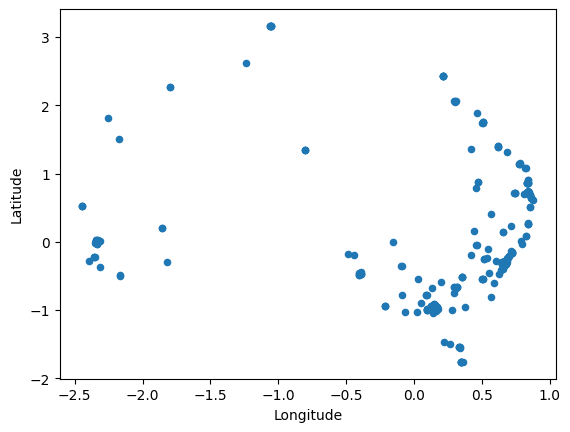

In [287]:
data_stand.plot(kind='scatter', y='Latitude', x='Longitude')
plt.show()

Thay thế tập dữ liệu sau khi chuẩn hóa

In [288]:
Sum_of_squared_distances = []
K= range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(data_stand)
    Sum_of_squared_distances.append(sum(np.min(cdist(data_stand,kmeans.cluster_centers_),axis=1)) / data_stand.shape[0])
    #dòng mã này tính trung bình của khoảng cách ngắn nhất từ mỗi điểm dữ liệu đến trung tâm cụm gần nhất 
    # và gắn kết giá trị trung bình này vào danh sách hiện có.

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Phương pháp khuỷu tay để giảm thiểu WCSS (Within-cluser Sum of Square)

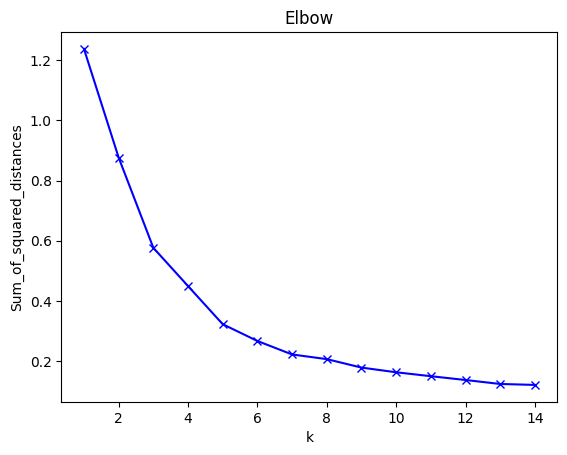

In [289]:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow')
plt.show()

Phần khuỷu với k là 7

In [290]:
km= KMeans(n_clusters=7)
km=km.fit(df[['Longitude', 'Latitude']])

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


using K-mean with k=7

In [291]:
print(km.labels_)


[3 3 0 2 3 4 1 3 3 3 2 2 2 5 3 0 2 6 0 0 2 4 3 2 2 3 5 2 6 0 0 1 2 0 0 2 6
 0 0 3 1 3 3 3 0 5 3 3 6 2 6 6 3 2 3 2 0 3 0 5 0 0 0 3 5 0 2 0 1 3 1 1 3 3
 0 0 3 3 0 2 6 6 2 2 0 2 1 0 4 4 0 1 3 2 5 0 5 0 2 0 6 3 1 5 3 1 0 2 3 3 0
 3 0 5 3 1 0 2 0 1 5 3 3 6 3 3 3 3 3 0 2 0 2 6 2 2 1 0 0 1 2 1 0 0 2 2 2 0
 3 3 2 3 0 5 0 1 4 1 3 0 1 0 1 3 3 0 3 0 3 1 0 0 0 5 1 3 0 4 1 2 1 6 0 1 5
 3 2 0 1 2 6 3 0 4 1 2 0 4 4 0 3 2 2 2 5 3 0 3 1 0 0 2 3 1 0 1 0 2 0 2 5 6
 2 5 0 4 5 5 1 0 0 0 3 1 2 3 5 3 3 3 2 0 3 3 6 3 2 0 5 2 1 0 3 4 5 0 3 3 2
 3 2 2 1 1 2 3 2 6 0 1 0 3 3 3 2 0 2 5 3 5 0 4 3 5 3 0 3 2 0 3 3 4 3 2 5 3
 1 0 3 3 1 1 2 1 3 3 0 5 1 2 2 3 3 1]


In [292]:
labels=km.labels_
labels=pd.DataFrame(labels,columns=['cluster'])
df_clustered=pd.concat([df[['Longitude', 'Latitude']],labels],axis=1)

In [293]:
df_clustered.sort_values('cluster',ascending=True)

,Longitude,Latitude,cluster
206,150.579432,-34.910027,0
138,151.712485,-32.876256,0
67,151.631583,-32.807662,0
142,151.040313,-33.832151,0
65,151.092447,-33.943943,0
...,...,...,...
51,145.767099,-16.935025,6
267,149.214499,-21.088707,6
80,146.729726,-19.258002,6
133,149.215576,-21.089924,6


Thêm cột cluster vào bảng df_clustered với các giá trị tương ứng 

In [294]:
print(km.labels_)
df_clustered.groupby('cluster').size()

[3 3 0 2 3 4 1 3 3 3 2 2 2 5 3 0 2 6 0 0 2 4 3 2 2 3 5 2 6 0 0 1 2 0 0 2 6
 0 0 3 1 3 3 3 0 5 3 3 6 2 6 6 3 2 3 2 0 3 0 5 0 0 0 3 5 0 2 0 1 3 1 1 3 3
 0 0 3 3 0 2 6 6 2 2 0 2 1 0 4 4 0 1 3 2 5 0 5 0 2 0 6 3 1 5 3 1 0 2 3 3 0
 3 0 5 3 1 0 2 0 1 5 3 3 6 3 3 3 3 3 0 2 0 2 6 2 2 1 0 0 1 2 1 0 0 2 2 2 0
 3 3 2 3 0 5 0 1 4 1 3 0 1 0 1 3 3 0 3 0 3 1 0 0 0 5 1 3 0 4 1 2 1 6 0 1 5
 3 2 0 1 2 6 3 0 4 1 2 0 4 4 0 3 2 2 2 5 3 0 3 1 0 0 2 3 1 0 1 0 2 0 2 5 6
 2 5 0 4 5 5 1 0 0 0 3 1 2 3 5 3 3 3 2 0 3 3 6 3 2 0 5 2 1 0 3 4 5 0 3 3 2
 3 2 2 1 1 2 3 2 6 0 1 0 3 3 3 2 0 2 5 3 5 0 4 3 5 3 0 3 2 0 3 3 4 3 2 5 3
 1 0 3 3 1 1 2 1 3 3 0 5 1 2 2 3 3 1]


cluster
0    76
1    41
2    59
3    83
4    13
5    26
6    16
dtype: int64

In [295]:
df_clustered.groupby('cluster').describe()

Longitude                                                            \
            count        mean       std         min         25%         50%   
cluster                                                                       
0            76.0  150.794015  0.942141  148.165715  150.847230  150.938418   
1            41.0  116.350438  1.638788  114.633660  115.813315  115.867241   
2            59.0  152.483737  1.207120  148.615682  152.342236  153.035270   
3            83.0  145.537518  1.161969  142.453477  144.824115  145.115004   
4            13.0  130.074713  3.797874  122.209323  130.857160  130.884275   
5            26.0  139.302433  1.400314  137.530221  138.557965  138.606683   
6            16.0  147.415733  1.487238  145.752977  145.769569  146.797932   

                                Latitude                                  \
                75%         max    count       mean       std        min   
cluster                                                                    
0        151.172229  152.887900     76.0 -33.619848  1.083207 -36.934800   
1        115.990337  121.898857     41.0 -31.566376  2.621065 -35.022251   
2        153.104041  153.528756     59.0 -27.030168  1.652260 -30.358152   
3        146.814081  147.615287     83.0 -38.126092  1.922503 -42.843881   
4        130.927522  133.870867     13.0 -16.144207  4.774798 -23.697612   
5        140.235383  142.199745     26.0 -34.977304  1.342975 -37.826125   
6        149.156016  149.215576     16.0 -19.455574  2.050423 -23.525484   

                                                     
               25%        50%        75%        max  
cluster                                              
0       -33.947633 -33.842060 -33.257095 -30.515230  
1       -32.110981 -31.972368 -31.845847 -20.773070  
2       -27.651981 -27.429166 -26.619492 -23.322530  
3       -38.081132 -37.831035 -37.633318 -35.118036  
4       -17.982866 -12.470807 -12.431262 -12.427766  
5       -34.909519 -34.848113 -34.826470 -31.953187  
6       -21.102863 -19.271607 -16.954809 -16.935025

In [296]:
centroids = km.cluster_centers_
centroids=pd.DataFrame(centroids,columns=['Centroid_Longitude','Centroid_Latitude'])
centroids

,Centroid_Longitude,Centroid_Latitude
0,150.794015,-33.619848
1,116.350438,-31.566376
2,152.483737,-27.030168
3,145.537518,-38.126092
4,130.074713,-16.144207
5,139.302433,-34.977304
6,147.415733,-19.455574


Tìm tọa độ trung tâm của mỗi cluster

<Axes: xlabel='Centroid_Longitude', ylabel='Centroid_Latitude'>

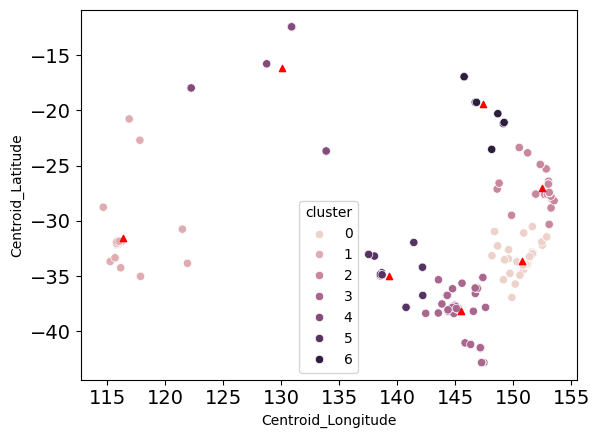

In [297]:
import seaborn as sns
s1=sns.scatterplot(data=df_clustered,x='Longitude',y='Latitude',hue='cluster')
centroids.plot(ax=s1,kind='scatter',x='Centroid_Longitude',y='Centroid_Latitude',color='red',fontsize=14,marker='^')

In ra đồ thị có khoang vùng cluster và mỗi điểm trung tâm của mỗi cluster đó 